# Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

# [6.2.5] Parse a Response from an API

In [6]:
# For each city in our lats_lngs list, we need to retrieve the following data and add it to a DataFrame.
# 1. city, country, and date
# 2. latitude and longitude 
# 3. maximum temperature
# 4. humidity
# 5. cloudiness
# 6. wind speed

# [6.2.6] Get the City Weather Data

# Import Dependencies, and Initialize an Empty List and Counters

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25ef2d0f860a1c2cafdd546279980e90


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval         ")
print("---------------------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval         
---------------------------------------


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval         ")
print("---------------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Conver the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the city information into the city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # If an error is experience, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------------------")
print("Data Retrieval Complete            ")
print("-----------------------------------------")

Beginning Data Retrieval         
---------------------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | samarkand
Processing Record 5 of Set 1 | vangaindrano
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | carutapera
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | praia da vitoria
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | xinyu
Processing Record 12 of Set 1 | shorewood
Processing Record 13 of Set 1 | haverfordwest
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | notodden
Processing Record 16 of Set 1 | gat
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | aksu
Processing Record 20 of Set 1 | mantua
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of S

Processing Record 39 of Set 4 | ossora
Processing Record 40 of Set 4 | grand baie
Processing Record 41 of Set 4 | kerema
Processing Record 42 of Set 4 | strezhevoy
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | saint anthony
Processing Record 45 of Set 4 | liverpool
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | biskamzha
Processing Record 48 of Set 4 | jalingo
Processing Record 49 of Set 4 | benghazi
Processing Record 50 of Set 4 | san patricio
Processing Record 1 of Set 5 | le marin
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | verkhnevilyuysk
Processing Record 4 of Set 5 | kondinskoye
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | foz
Processing Record 7 of Set 5 | myskhako
Processing Record 8 of Set 5 | deori khas
Processing Record 9 of Set 5 | bethanien
Processing Record 10 of Set 5 | general pico
Processing Record 11 of Set 5 | mahebourg
Processing Record 12 of Set 5 | tuata

Processing Record 27 of Set 8 | chimbote
Processing Record 28 of Set 8 | naze
Processing Record 29 of Set 8 | viareggio
Processing Record 30 of Set 8 | tidore
City not found. Skipping...
Processing Record 31 of Set 8 | mitu
Processing Record 32 of Set 8 | clyde river
Processing Record 33 of Set 8 | qabis
City not found. Skipping...
Processing Record 34 of Set 8 | porto novo
Processing Record 35 of Set 8 | kruisfontein
Processing Record 36 of Set 8 | road town
Processing Record 37 of Set 8 | kitimat
Processing Record 38 of Set 8 | luderitz
Processing Record 39 of Set 8 | fairbanks
Processing Record 40 of Set 8 | smithers
Processing Record 41 of Set 8 | tulagi
Processing Record 42 of Set 8 | umea
Processing Record 43 of Set 8 | gusau
Processing Record 44 of Set 8 | zhumadian
Processing Record 45 of Set 8 | luena
Processing Record 46 of Set 8 | bex
Processing Record 47 of Set 8 | saint-francois
Processing Record 48 of Set 8 | hashtrud
Processing Record 49 of Set 8 | emba
Processing Record

Processing Record 11 of Set 12 | panama city
Processing Record 12 of Set 12 | tiksi
Processing Record 13 of Set 12 | kailua
Processing Record 14 of Set 12 | klyuchevskiy
Processing Record 15 of Set 12 | hami
Processing Record 16 of Set 12 | qasigiannguit
Processing Record 17 of Set 12 | namatanai
Processing Record 18 of Set 12 | ugoofaaru
Processing Record 19 of Set 12 | ola
Processing Record 20 of Set 12 | sidi ali
Processing Record 21 of Set 12 | souillac
Processing Record 22 of Set 12 | dera bugti
Processing Record 23 of Set 12 | korla
Processing Record 24 of Set 12 | kidal
Processing Record 25 of Set 12 | nizhniy mamon
Processing Record 26 of Set 12 | chardara
Processing Record 27 of Set 12 | lasa
Processing Record 28 of Set 12 | adjumani
Processing Record 29 of Set 12 | korem
Processing Record 30 of Set 12 | molango
Processing Record 31 of Set 12 | plouzane
Processing Record 32 of Set 12 | oskemen
Processing Record 33 of Set 12 | imeni zhelyabova
Processing Record 34 of Set 12 | k

# [6.2.7] Create a DataFrame of City Weather Data

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.40,68,1,8.05,US,2021-03-23 19:13:49
1,Puerto Ayora,-0.7393,-90.3518,82.99,78,40,6.91,EC,2021-03-23 19:14:16
2,Ushuaia,-54.8000,-68.3000,48.20,93,75,9.22,AR,2021-03-23 19:11:30
3,Samarkand,39.6542,66.9597,44.60,93,75,13.80,UZ,2021-03-23 19:16:08
4,Vangaindrano,-23.3500,47.6000,74.30,96,100,7.23,MG,2021-03-23 19:16:08
5,Saskylakh,71.9167,114.0833,-39.77,100,63,5.57,RU,2021-03-23 19:16:09
6,Carutapera,-1.1950,-46.0200,81.36,81,81,7.72,BR,2021-03-23 19:16:09
7,Mar Del Plata,-38.0023,-57.5575,75.20,53,20,10.36,AR,2021-03-23 19:12:56
8,Praia Da Vitoria,38.7333,-27.0667,59.00,63,75,13.29,PT,2021-03-23 19:12:57
9,Xinyu,27.8043,114.9334,48.06,80,39,3.11,CN,2021-03-23 19:16:09


In [14]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df[new_column_order]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.40,68,1,8.05,US,2021-03-23 19:13:49
1,Puerto Ayora,-0.7393,-90.3518,82.99,78,40,6.91,EC,2021-03-23 19:14:16
2,Ushuaia,-54.8000,-68.3000,48.20,93,75,9.22,AR,2021-03-23 19:11:30
3,Samarkand,39.6542,66.9597,44.60,93,75,13.80,UZ,2021-03-23 19:16:08
4,Vangaindrano,-23.3500,47.6000,74.30,96,100,7.23,MG,2021-03-23 19:16:08


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# [6.3.1] Plot Latitude vs. Max Temperature

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

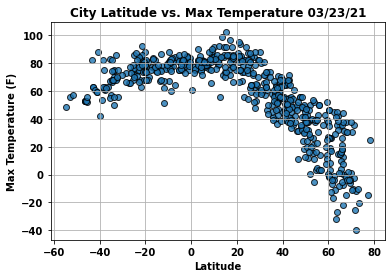

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# [6.3.2] Plot Latitude vs. Humidity

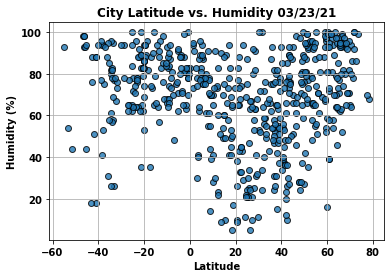

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# [6.3.3] Plot Latitude vs. Cloudiness

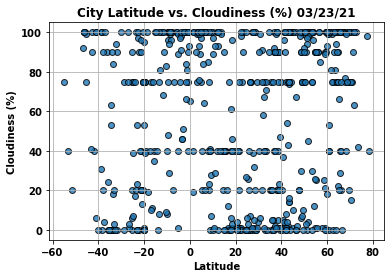

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# [6.3.4] Plot Latitude vs. Wind Speed

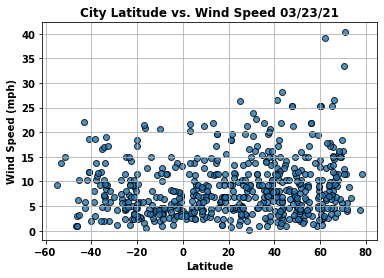

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# [6.4.2] Find the Correlation Between Latitude and Maximum Temperature

# Create a Linear Regression Function

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates ):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y  = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r_value is {r_value:.2f}")

# Create the Hemisphere DataFrames

In [23]:
# Apply loc method to city_data_df atthe index 13.
index13 = city_data_df.loc[13]
index13

City                     Notodden
Lat                       59.5594
Lng                        9.2585
Max Temp                     51.8
Humidity                       54
Cloudiness                      0
Wind Speed                   8.05
Country                        NO
Date          2021-03-23 19:16:10
Name: 13, dtype: object

In [24]:
# Filter the city_data_df DataFrame to get all the Northern Hemisphere latitudes
# for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
573    False
574     True
575     True
576     True
577    False
Name: Lat, Length: 578, dtype: bool

In [25]:
# Create a new DataFrame for only Nothern Hemisphere latitudes using loc method and conditional filter.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.40,68,1,8.05,US,2021-03-23 19:13:49
3,Samarkand,39.6542,66.9597,44.60,93,75,13.80,UZ,2021-03-23 19:16:08
5,Saskylakh,71.9167,114.0833,-39.77,100,63,5.57,RU,2021-03-23 19:16:09
8,Praia Da Vitoria,38.7333,-27.0667,59.00,63,75,13.29,PT,2021-03-23 19:12:57
9,Xinyu,27.8043,114.9334,48.06,80,39,3.11,CN,2021-03-23 19:16:09


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

The r_value is -0.87


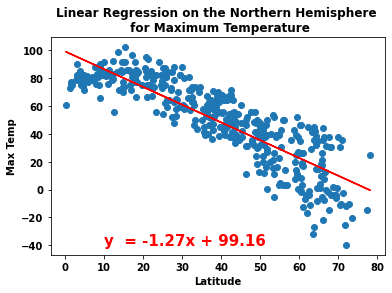

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Max Temp',(10,-40))

# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

The r_value is 0.62


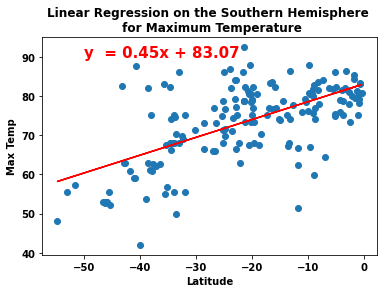

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Max Temp',(-50,90))

# [6.4.3] Find the Correlation Between Latitude and Percent Humidity

The r_value is 0.29


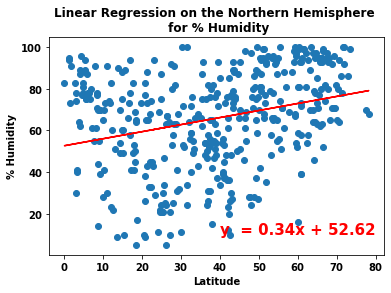

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title =  'Linear Regression on the Northern Hemisphere \n for % Humidity'
# Call the function.
plot_linear_regression(x_values, y_values, title,  '% Humidity',(40,10))

The r_value is 0.13


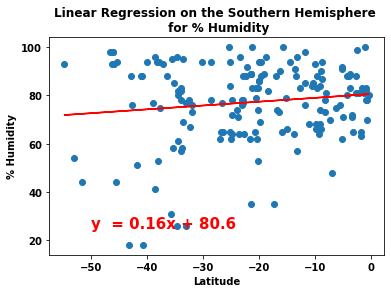

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = 'Linear Regression on the Southern Hemisphere \n for % Humidity'
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Humidity', (-50, 25))

# [6.4.4] Find the Correlation Between Latitude and Percent Cloudiness

The r_value is 0.18


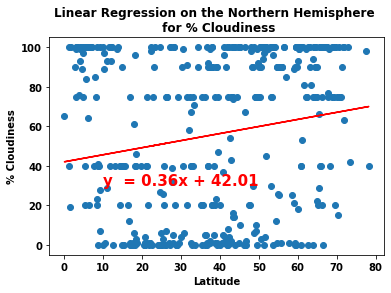

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = 'Linear Regression on the Northern Hemisphere \n for % Cloudiness'
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Cloudiness', (10, 30))

The r_value is 0.24


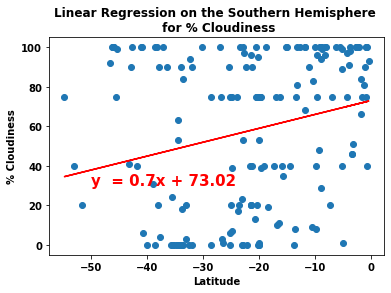

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = 'Linear Regression on the Southern Hemisphere \n for % Cloudiness'
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Cloudiness', (-50, 30))

# [6.4.5] Find the Correlation Between Latitude and Wind Speed

The r_value is 0.12


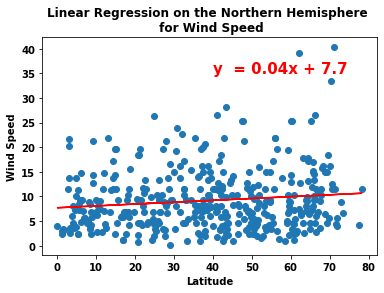

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title =  'Linear Regression on the Northern Hemisphere \n for Wind Speed'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Wind Speed',(40,35))

The r_value is -0.19


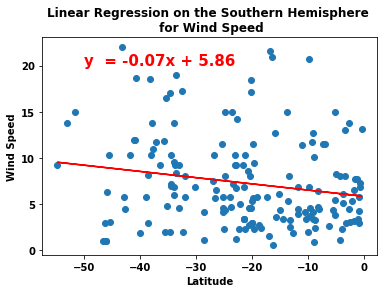

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title =  'Linear Regression on the Southern Hemisphere \n for Wind Speed'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Wind Speed',(-50,20))